Generated Numbers: [ 861 3773 3093 ... 1869 2335 3375]
Target Sum: 256135


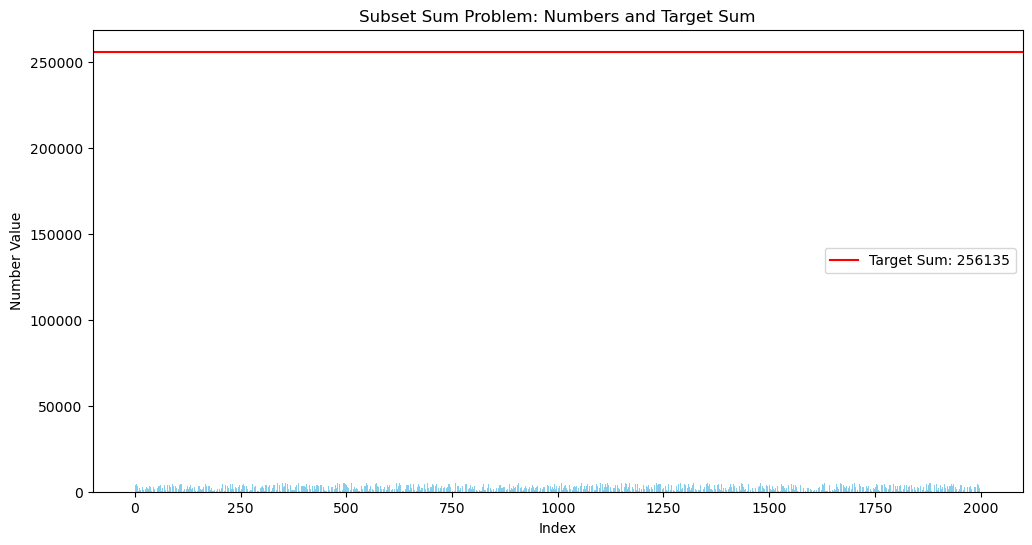

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Generate a list of random numbers
n_numbers = 2000
numbers = np.random.randint(1, 5001, size=n_numbers)  # Random integers between 1 and 1000

# Define a target sum
# For demonstration, let's randomly select a subset and sum it to define a realistic target
subset_indices = np.random.choice(range(n_numbers), size=100, replace=False)
target_sum = np.sum(numbers[subset_indices])

print(f"Generated Numbers: {numbers}")
print(f"Target Sum: {target_sum}")

# Visualize the numbers and the target sum
plt.figure(figsize=(12, 6))
plt.bar(range(n_numbers), numbers, color='skyblue')
plt.axhline(y=target_sum, color='r', linestyle='-', label=f'Target Sum: {target_sum}')
plt.xlabel('Index')
plt.ylabel('Number Value')
plt.title('Subset Sum Problem: Numbers and Target Sum')
plt.legend()
plt.show()


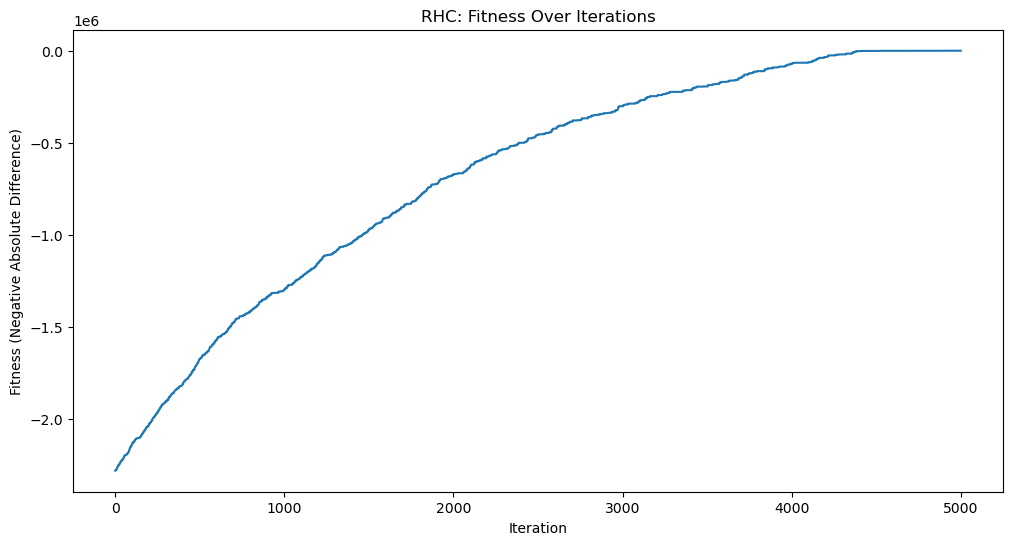

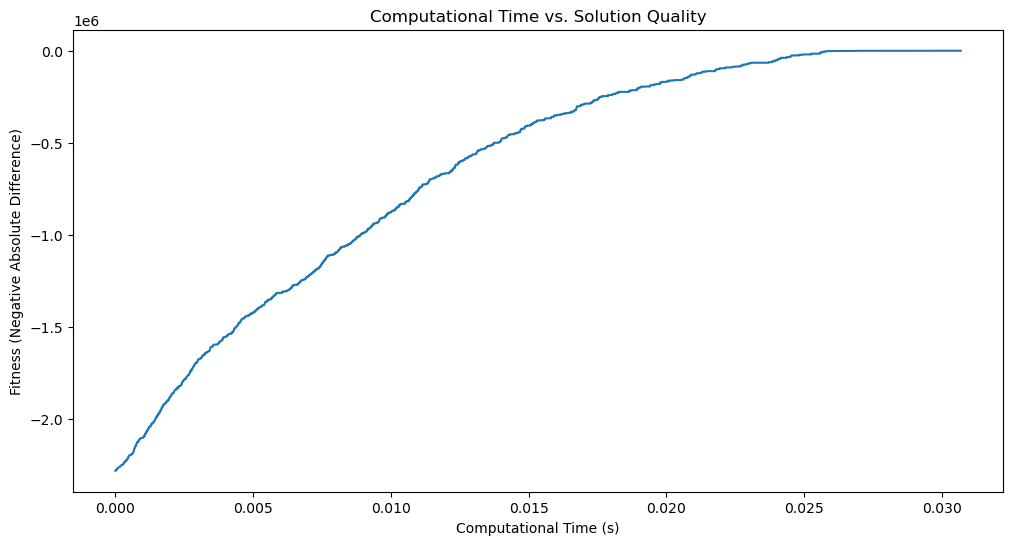

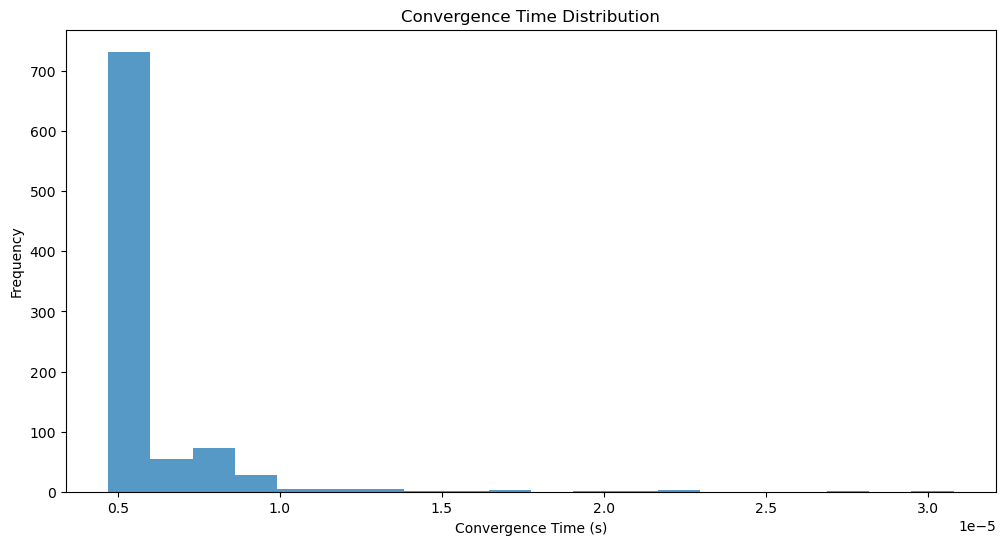

Best solution (RHC): [0 0 0 ... 0 0 0]
Best fitness (RHC): -45
Target Sum: 256135


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Set up for the Subset Sum Problem is already defined in the first cell of your Jupyter Notebook

def fitness(solution, numbers, target_sum):
    """Calculate the fitness of a solution as the negative absolute difference from the target sum."""
    subset_sum = np.dot(solution, numbers)
    return -abs(subset_sum - target_sum)

def rhc_subset_sum(numbers, target_sum, iterations=5000):
    """Randomized Hill Climbing algorithm tailored for the Subset Sum Problem."""
    n_numbers = len(numbers)
    best_solution = np.random.choice([0, 1], size=n_numbers)
    best_fitness = fitness(best_solution, numbers, target_sum)
    fitness_over_time = [best_fitness]
    
    time_log = []
    cumulative_time_log = [0]  # To store cumulative time for solution quality plot
    convergence_times = []  # To store times of convergence events

    for iteration in range(iterations):
        start_time = time.perf_counter()

        # Generate a neighbor by flipping one bit
        neighbor = best_solution.copy()
        flip_index = np.random.randint(0, n_numbers)
        neighbor[flip_index] = 1 - neighbor[flip_index]  # Flip the bit

        neighbor_fitness = fitness(neighbor, numbers, target_sum)

        # Accept the neighbor if it's better
        if neighbor_fitness > best_fitness:
            best_solution, best_fitness = neighbor, neighbor_fitness
            convergence_times.append(time.perf_counter() - start_time)

        fitness_over_time.append(best_fitness)

        end_time = time.perf_counter()
        time_log.append(end_time - start_time)
        cumulative_time_log.append(cumulative_time_log[-1] + (end_time - start_time))

    # Plotting the fitness over iterations
    plt.figure(figsize=(12, 6))
    plt.plot(fitness_over_time)
    plt.xlabel('Iteration')
    plt.ylabel('Fitness (Negative Absolute Difference)')
    plt.title('RHC: Fitness Over Iterations')
    plt.show()

    # Plot Computational Time vs. Solution Quality
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_time_log, fitness_over_time)
    plt.xlabel('Computational Time (s)')
    plt.ylabel('Fitness (Negative Absolute Difference)')
    plt.title('Computational Time vs. Solution Quality')
    plt.show()

    # Plot Convergence Time Distribution
    plt.figure(figsize=(12, 6))
    plt.hist(convergence_times, bins=20, alpha=0.75)
    plt.xlabel('Convergence Time (s)')
    plt.ylabel('Frequency')
    plt.title('Convergence Time Distribution')
    plt.show()

    return best_solution, best_fitness

# Run the RHC algorithm for the Subset Sum Problem
best_solution_ssp, best_fitness_ssp = rhc_subset_sum(numbers, target_sum)
print(f"Best solution (RHC): {best_solution_ssp}\nBest fitness (RHC): {best_fitness_ssp}\nTarget Sum: {target_sum}")


C:\Users\hoode\AppData\Local\Temp\ipykernel_13324\1741601107.py:36: RuntimeWarning: overflow encountered in divide
  if neighbor_fitness > current_fitness or np.random.rand() < np.exp((neighbor_fitness - current_fitness) / temp):
C:\Users\hoode\AppData\Local\Temp\ipykernel_13324\1741601107.py:36: RuntimeWarning: divide by zero encountered in divide
  if neighbor_fitness > current_fitness or np.random.rand() < np.exp((neighbor_fitness - current_fitness) / temp):


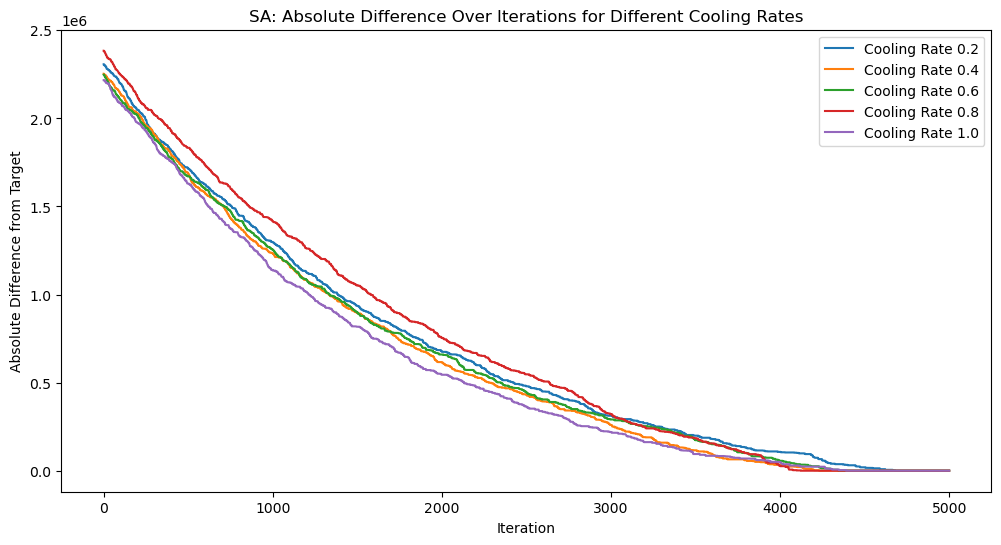

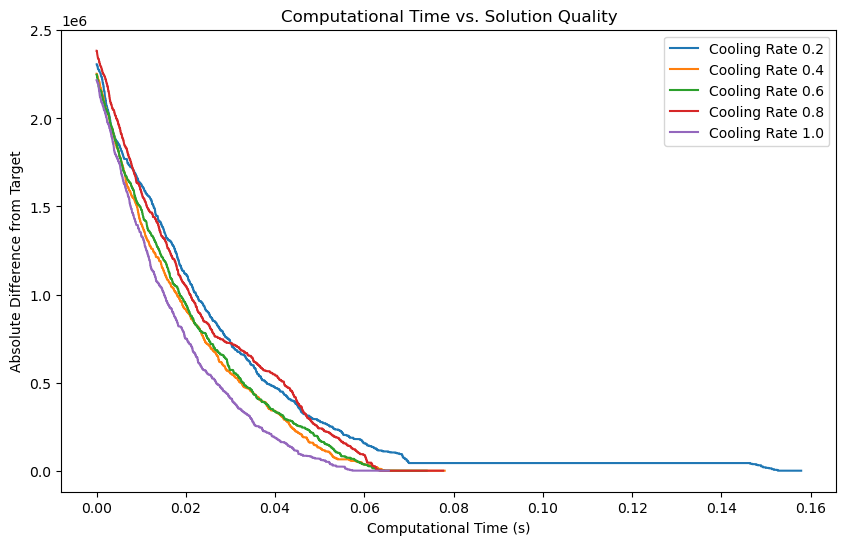

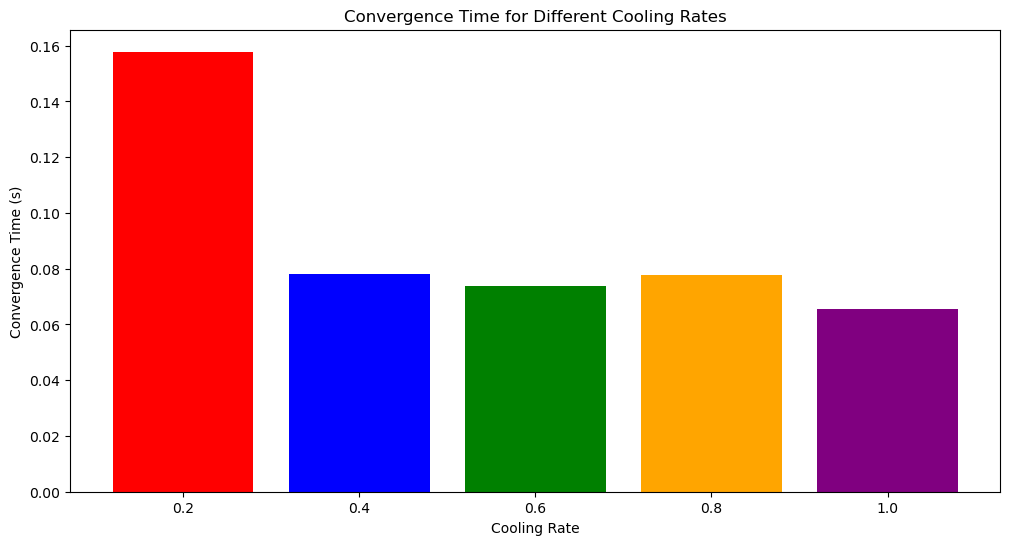

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Assuming numbers and target_sum are already defined in the first cell of your Jupyter notebook
np.random.seed(42)

def sa_subset_sum(numbers, target_sum, iterations=5000, initial_temp=100, cooling_rates=[0.95]):
    n_numbers = len(numbers)
    
    # Initialize results storage
    differences_over_time = {cr: [] for cr in cooling_rates}
    quality_time_data = {cr: [] for cr in cooling_rates}
    convergence_data = {cr: [] for cr in cooling_rates}
    
    def fitness(solution):
        return -abs(np.sum(solution * numbers) - target_sum)
    
    for cooling_rate in cooling_rates:
        current_solution = np.random.choice([0, 1], size=n_numbers, p=[0.5, 0.5])
        current_fitness = fitness(current_solution)
        
        cumulative_time = 0
        
        temp = initial_temp
        for iteration in range(iterations):
            start_time = time.perf_counter()
            
            # Generate a neighbor by flipping a single bit
            neighbor = current_solution.copy()
            flip_index = np.random.randint(n_numbers)
            neighbor[flip_index] = 1 - neighbor[flip_index]
            neighbor_fitness = fitness(neighbor)
            
            # Accept or reject the neighbor based on the fitness
            if neighbor_fitness > current_fitness or np.random.rand() < np.exp((neighbor_fitness - current_fitness) / temp):
                current_solution, current_fitness = neighbor, neighbor_fitness
            
            differences_over_time[cooling_rate].append(-current_fitness)
            end_time = time.perf_counter()
            cumulative_time += end_time - start_time
            quality_time_data[cooling_rate].append((cumulative_time, -current_fitness))
            
            temp *= cooling_rate
        
        convergence_data[cooling_rate] = cumulative_time

    # Plotting Fitness Function over Iterations for different cooling rates
    plt.figure(figsize=(12, 6))
    for cr, differences in differences_over_time.items():
        plt.plot(differences, label=f'Cooling Rate {cr}')
    plt.xlabel('Iteration')
    plt.ylabel('Absolute Difference from Target')
    plt.title('SA: Absolute Difference Over Iterations for Different Cooling Rates')
    plt.legend()
    plt.show()

    # Plot Computational Time vs. Solution Quality for all cooling rates
    plt.figure(figsize=(10, 6))
    for cr, data in quality_time_data.items():
        times, qualities = zip(*data)
        plt.plot(times, qualities, label=f'Cooling Rate {cr}')
    plt.xlabel('Computational Time (s)')
    plt.ylabel('Absolute Difference from Target')
    plt.title('Computational Time vs. Solution Quality')
    plt.legend()
    plt.show()

    # Plot Convergence Time for all cooling rates
    plt.figure(figsize=(12, 6))
    rates = list(convergence_data.keys())
    times = [convergence_data[cr] for cr in rates]
    x_positions = np.arange(len(rates))
    plt.bar(x_positions, times, color=['red', 'blue', 'green', 'orange', 'purple'])
    plt.xlabel('Cooling Rate')
    plt.ylabel('Convergence Time (s)')
    plt.title('Convergence Time for Different Cooling Rates')
    plt.xticks(x_positions, rates)
    plt.show()

# Set cooling rates as specified
cooling_rates = [0.2, 0.4, 0.6, 0.8, 1.0]

# Run the SA algorithm for SSP with different cooling rates
sa_subset_sum(numbers, target_sum, iterations=5000, initial_temp=100, cooling_rates=cooling_rates)


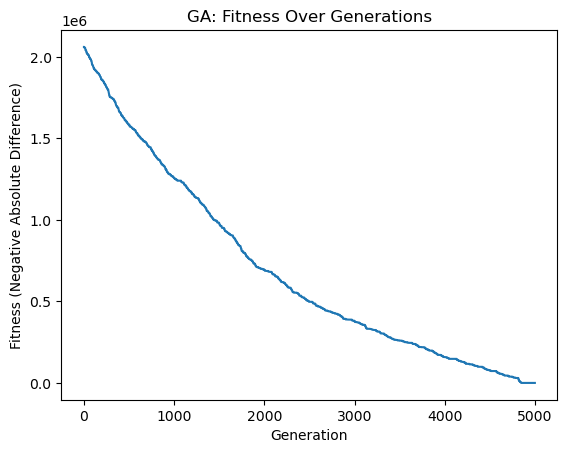

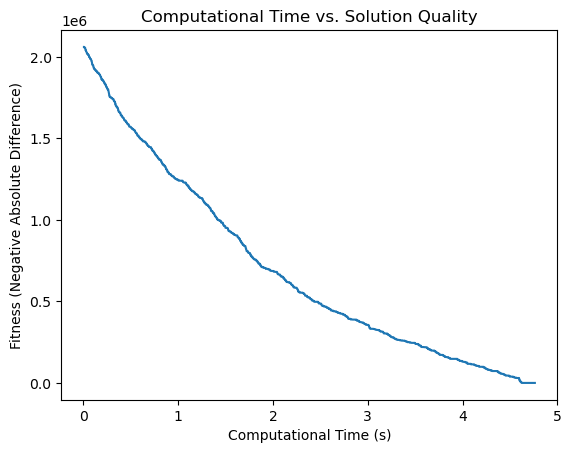

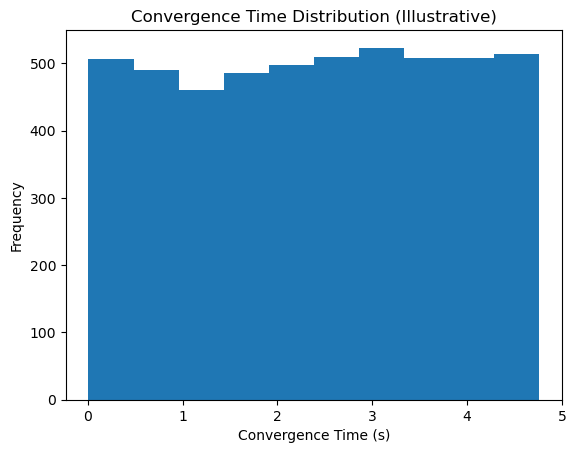

Best solution (GA): [0 0 0 ... 0 0 0]
Best fitness (GA): 189


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Ensure 'numbers' and 'target_sum' are defined as per your setup
np.random.seed(42)

def genetic_algorithm_ssp(numbers, target_sum, population_size, generations, mutation_rate, crossover_rate):
    n_numbers = len(numbers)

    def fitness(solution):
        return -abs(np.sum(solution * numbers) - target_sum)

    def normalize_probabilities(fitness_values):
        exp_fitness = np.exp(fitness_values - np.max(fitness_values))  # Subtract max to avoid overflow
        if np.any(np.isnan(exp_fitness)) or np.sum(exp_fitness) == 0:
            return np.ones_like(fitness_values) / len(fitness_values)  # Uniform probabilities if invalid
        else:
            return exp_fitness / np.sum(exp_fitness)

    population = np.random.randint(2, size=(population_size, n_numbers))
    fitness_history = []
    cumulative_time = []
    total_time = 0

    for generation in range(generations):
        start_time = time.perf_counter()
        fitness_values = np.array([fitness(individual) for individual in population])
        fitness_history.append(-fitness_values.max())

        probabilities = normalize_probabilities(fitness_values)
        parents_indices = np.random.choice(population_size, size=population_size, replace=True, p=probabilities)
        parents = population[parents_indices]

        children = []
        for i in range(0, population_size, 2):
            child1, child2 = parents[i].copy(), parents[i+1].copy()
            if np.random.rand() < crossover_rate:
                crossover_point = np.random.randint(1, n_numbers - 1)
                child1[:crossover_point], child2[:crossover_point] = child2[:crossover_point], child1[:crossover_point]
            children.extend([child1, child2])

        for i in range(population_size):
            if np.random.rand() < mutation_rate:
                mutation_point = np.random.randint(n_numbers)
                children[i][mutation_point] = 1 - children[i][mutation_point]

        population = np.array(children)
        end_time = time.perf_counter()
        total_time += end_time - start_time
        cumulative_time.append(total_time)

    best_fitness_idx = np.argmax(fitness_values)
    best_solution = population[best_fitness_idx]
    best_fitness = -fitness_values[best_fitness_idx]

    plt.plot(fitness_history)
    plt.xlabel('Generation')
    plt.ylabel('Fitness (Negative Absolute Difference)')
    plt.title('GA: Fitness Over Generations')
    plt.show()

    plt.plot(cumulative_time, fitness_history)
    plt.xlabel('Computational Time (s)')
    plt.ylabel('Fitness (Negative Absolute Difference)')
    plt.title('Computational Time vs. Solution Quality')
    plt.show()

    plt.hist(cumulative_time, bins=10)
    plt.xlabel('Convergence Time (s)')
    plt.ylabel('Frequency')
    plt.title('Convergence Time Distribution (Illustrative)')
    plt.show()

    return best_solution, best_fitness

# Running the adapted Genetic Algorithm for the Subset Sum Problem
best_solution_ssp, best_fitness_ssp = genetic_algorithm_ssp(
    numbers, target_sum, population_size=100, generations=5000,
    mutation_rate=0.01, crossover_rate=0.7
)
print(f"Best solution (GA): {best_solution_ssp}\nBest fitness (GA): {best_fitness_ssp}")


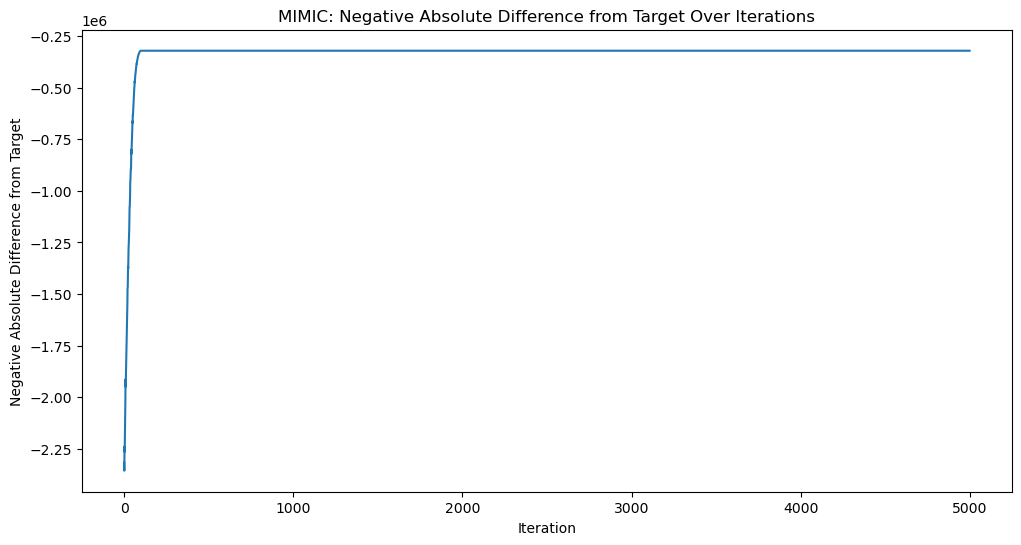

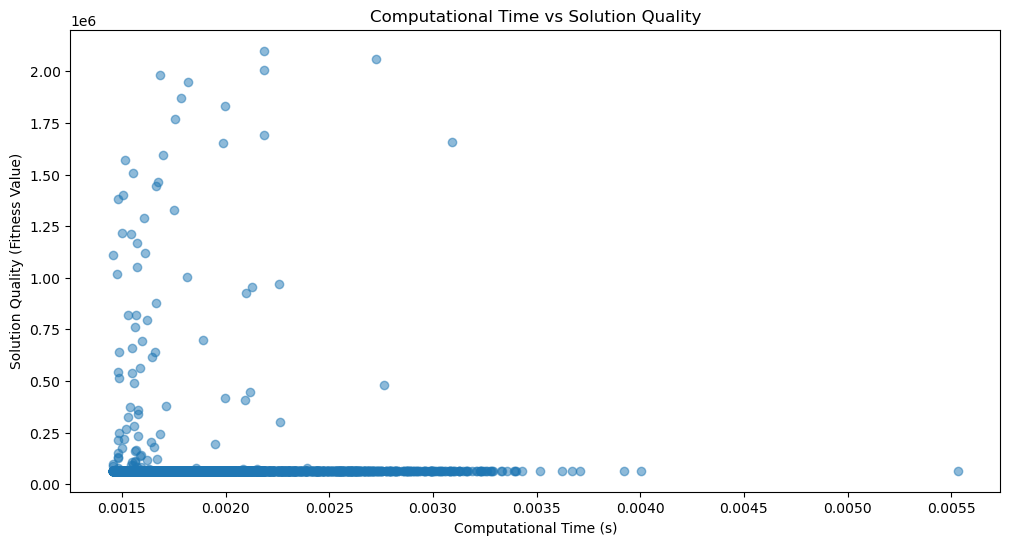

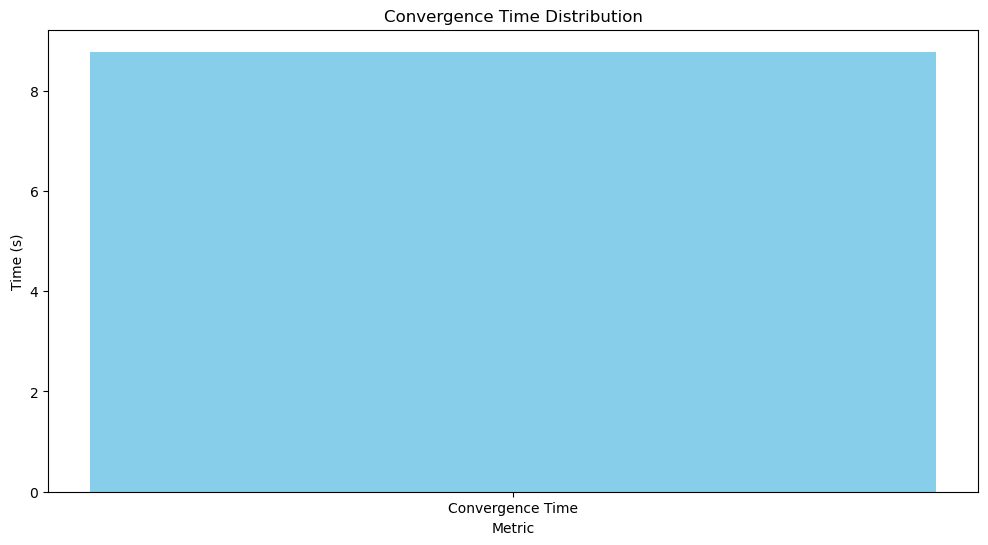

Best solution (MIMIC): [1 0 0 ... 0 0 0]
Best fitness (MIMIC): 65137


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Assuming 'numbers' and 'target_sum' are already defined as in your Jupyter notebook setup
np.random.seed(42)

def mimic_subset_sum(numbers, target_sum, population_size, iterations):
    n_numbers = len(numbers)
    population = np.random.randint(2, size=(population_size, n_numbers))
    fitness_history = []
    time_log = []
    time_quality_data = []

    for iteration in range(iterations):
        start_time = time.perf_counter()

        subset_sums = np.dot(population, numbers)
        fitness = -np.abs(subset_sums - target_sum)

        sorted_indices = np.argsort(fitness)
        population = population[sorted_indices]

        selected = population[-int(population_size * 0.5):]
        probabilities = np.mean(selected, axis=0)

        new_population = np.random.rand(population_size, n_numbers) < probabilities
        population = new_population.astype(int)

        current_best_value = -fitness[sorted_indices[-1]]
        fitness_history.append(current_best_value)
        time_quality_data.append((time.perf_counter() - start_time, current_best_value))

    # Plot the Negative Absolute Difference from the target over iterations
    plt.figure(figsize=(12, 6))
    plt.plot(-np.array(fitness_history) - target_sum)
    plt.xlabel('Iteration')
    plt.ylabel('Negative Absolute Difference from Target')
    plt.title('MIMIC: Negative Absolute Difference from Target Over Iterations')
    plt.show()

    best_index = np.argmax(fitness)
    best_solution = population[best_index]
    best_value = -fitness[best_index]

    # Plot Computational Time vs Solution Quality
    times, qualities = zip(*time_quality_data)
    plt.figure(figsize=(12, 6))
    plt.scatter(times, qualities, alpha=0.5)
    plt.xlabel('Computational Time (s)')
    plt.ylabel('Solution Quality (Fitness Value)')
    plt.title('Computational Time vs Solution Quality')
    plt.show()

    # Plot Convergence Time Distribution
    convergence_time = sum(times)
    plt.figure(figsize=(12, 6))
    plt.bar('Convergence Time', convergence_time, color='skyblue')
    plt.xlabel('Metric')
    plt.ylabel('Time (s)')
    plt.title('Convergence Time Distribution')
    plt.show()

    return best_solution, best_value

# Running the adapted MIMIC Algorithm for the Subset Sum Problem
best_solution_ssp, best_fitness_ssp = mimic_subset_sum(
    numbers, target_sum, population_size=100, iterations=5000
)
print(f"Best solution (MIMIC): {best_solution_ssp}\nBest fitness (MIMIC): {best_fitness_ssp}")
